# Part 1: Tutorial for create CNN layers

## A] convolutional layer

Load an RGB image and display it

Downloading...
From: https://drive.google.com/uc?id=1SvWpkbiwfkrA8LVAp-4ERGrNnvkvAhHv
To: /content/yellow_car.jpg
100%|██████████| 110k/110k [00:00<00:00, 11.2MB/s]


File 'yellow_car.jpg' downloaded successfully!


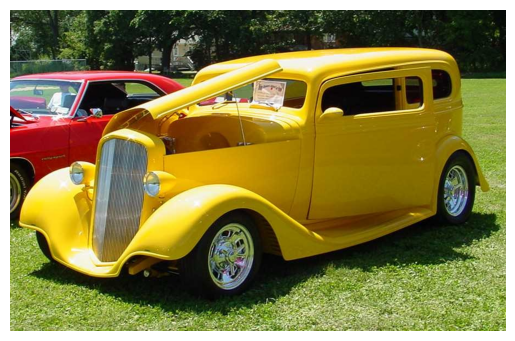

In [ ]:
import gdown # Import the gdown library to download files from Google Drive
from PIL import Image # Import the Pillow library for image manipulation
import matplotlib.pyplot as plt # Import matplotlib for plotting images

# File ID of the image on Google Drive
file_id = '1SvWpkbiwfkrA8LVAp-4ERGrNnvkvAhHv'

# Desired name for the downloaded image file
image = 'yellow_car.jpg'

try:
    # Download the file from Google Drive using the file_id and save it with the specified image name
    gdown.download(id=file_id, output=image, fuzzy=True)
    print(f"File '{image}' downloaded successfully!") # Print a success message

    # Open the downloaded image file
    img = Image.open(image)
    # Display the image using matplotlib
    plt.imshow(img)
    plt.axis('off') # Hide the axes for a cleaner image display
    plt.show() # Show the plot

except Exception as e:
    # Catch any exceptions that occur during download or processing
    print(f"An error occurred during download or processing: {e}") # Print the error message
    # Provide guidance on potential causes of the error
    print("Please ensure the shared link has open access.")

The image are RGB, so there is 3 channels. For simplification we will convert it in grayscale in order to have only one channel.

In [ ]:
# Print the original image shape (width, height, number of channels - 3 for RGB)
print('RGB image shape:', img.size[0], img.size[1], len(img.getbands()))
img = img.convert('L') # Convert the image to grayscale ('L' mode has 1 channel)
# Print the grayscale image shape (width, height, number of channels - 1 for grayscale)
print('Grayscale image shape:', img.size[0], img.size[1], len(img.getbands()))

RGB image shape: 907 587 3
Grayscale image shape: 907 587 1


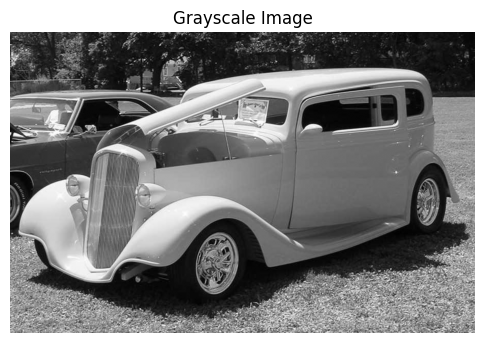

In [ ]:
# Visualize the grayscale image
plt.figure(figsize=(6, 4)) # Optional: set figure size
plt.imshow(img, cmap='gray') # Use 'gray' colormap for grayscale images
plt.title("Grayscale Image")
plt.axis('off') # Hide axes
plt.show()

Now we will preprocess the image, to make it readable in PyTorch. Be careful with dimensions.

In [ ]:
import torchvision.transforms as transforms # Import transforms module from torchvision
# Define a transform to convert a PIL Image to a PyTorch Tensor
transform = transforms.ToTensor()  # Converts image to [C, H, W] format with values in [0, 1]
img_tensor = transform(img)  # Apply the transform to the grayscale image. Shape: [1, H, W] (1 channel, Height, Width)

# Add a batch dimension to the tensor: [B, C, H, W]. CNN layers expect a batch dimension.
input_tensor = img_tensor.unsqueeze(0)  # Shape: [1, 1, H, W] (Batch size of 1, 1 channel, Height, Width)

Ok, now we can create a convolutionnal layer with `Conv2D()` with a filter of 3x3pixels size.



In [ ]:
import torch.nn as nn # Import the neural network module from PyTorch
# Define a 2D convolutional layer
# in_channels=1: The input image has 1 channel (grayscale)
# out_channels=1: The output will have 1 channel (one filter applied)
# kernel_size=3: The filter/kernel size is 3x3 pixels
# bias=True: Include a bias term in the convolution
conv2d = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=3, bias=True)

Now we will define the weights of the filter manually. A frequent filter is the Sobel Edge Detector filter. We can design it to detect horizontal or vertical lines in the images.

In [ ]:
import numpy as np # Import the numpy library
# Define the weights for a horizontal line detector filter as a NumPy array
filter_weights = np.array([[ -1, -2, -1],
                           [  0,  0, 0],
                           [  1,  2, 1]], dtype=np.float32)
# Reshape the filter weights to match the expected input shape for a Conv2d layer: [out_channels, in_channels, H, W]
filter_weights = filter_weights.reshape(1, 1, 3, 3)  # [1 output channel, 1 input channel, 3 height, 3 width]

We update the weight of the convolution layer `con2d` defined above.

In [ ]:
import torch # Import the PyTorch library
# Set the weights of the convolution layer manually using the defined filter_weights
with torch.no_grad(): # Disable gradient calculation for this block
    conv2d.weight[:] = torch.tensor(filter_weights) # Assign the filter weights to the layer's weight parameter
    conv2d.bias[:] = torch.tensor([0.0]) # Set the bias of the layer to 0.0

# Apply the convolution layer to the input image tensor
output_tensor = conv2d(input_tensor)  # The convolution operation is performed. Shape: [1, 1, H_out, W_out]

Display the results of the convolution. Be careful to image dimension, you need to remove the extra dimension (here the batch and channel dimensions) with `squeeze()`function. Another important point is that `matplotlib` library only uses numpy array. Thus we need to convert it in numpy array before with `detach().numpy()`.

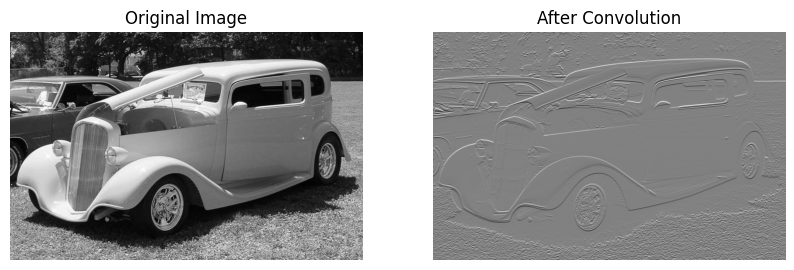

In [ ]:
import matplotlib.pyplot as plt # Import matplotlib for plotting

# Remove the batch and channel dimensions from the output tensor
# squeeze(): Removes dimensions of size 1
# detach(): Creates a new tensor that does not require gradients
# numpy(): Converts the tensor to a NumPy array for plotting with matplotlib
output_image = output_tensor.squeeze().detach().numpy()

# Create a figure with a specified size to display multiple plots
plt.figure(figsize=(10, 4))

# Create the first subplot for the original image
plt.subplot(1, 2, 1) # 1 row, 2 columns, select the 1st plot
# Display the original image tensor (after squeezing the channel dimension)
plt.imshow(img_tensor.squeeze(), cmap='gray') # Use 'gray' colormap for grayscale images
plt.title('Original Image') # Set the title for the first subplot
plt.axis('off') # Hide the axes

# Create the second subplot for the convolved image
plt.subplot(1, 2, 2) # 1 row, 2 columns, select the 2nd plot
# Display the output image (after convolution)
plt.imshow(output_image, cmap='gray') # Use 'gray' colormap
plt.title('After Convolution') # Set the title for the second subplot
plt.axis('off') # Hide the axes

plt.show() # Show the figure with both plots

Now do the same with a vertical line detector filter.

In [ ]:
# Define the weights for a vertical line detector filter as a NumPy array
filter_weights = np.array([[ -1, 0, 1],
                           [ -2, 0, 2],
                           [ -1, 0, 1]], dtype=np.float32)
# Reshape the filter weights to match the expected input shape for a Conv2d layer: [out_channels, in_channels, H, W]
filter_weights = filter_weights.reshape(1, 1, 3, 3)  # [1 output channel, 1 input channel, 3 height, 3 width]

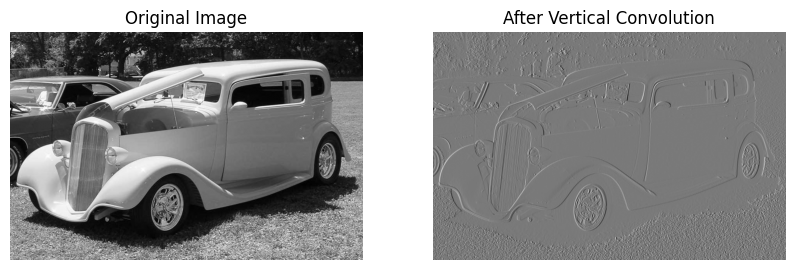

In [ ]:
# Here your code

# Redefine the convolution layer (reusing the same variable name `conv2d`)
# Keep the same parameters as before: in_channels=1, out_channels=1, kernel_size=3, bias=True
conv2d = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=3, bias=True)

# Set the weights of the convolution layer manually using the defined vertical filter_weights
with torch.no_grad(): # Disable gradient calculation
    conv2d.weight[:] = torch.tensor(filter_weights) # Assign the vertical filter weights
    conv2d.bias[:] = torch.tensor([0.0]) # Set the bias to 0.0

# Apply the convolution layer with the vertical filter to the input image tensor
output_tensor = conv2d(input_tensor)  # The convolution operation is performed. Shape: [1, 1, H_out, W_out]

# Remove the batch and channel dimensions from the output tensor for plotting
output_image = output_tensor.squeeze().detach().numpy()

# Create a figure to display the original and vertically convolved images
plt.figure(figsize=(10, 4))

# Create the first subplot for the original image
plt.subplot(1, 2, 1) # 1 row, 2 columns, 1st plot
# Display the original image
plt.imshow(img_tensor.squeeze(), cmap='gray') # Use 'gray' colormap
plt.title('Original Image') # Set title
plt.axis('off') # Hide axes

# Create the second subplot for the vertically convolved image
plt.subplot(1, 2, 2) # 1 row, 2 columns, 2nd plot
# Display the output image after vertical convolution
plt.imshow(output_image, cmap='gray') # Use 'gray' colormap
plt.title('After Vertical Convolution') # Set title
plt.axis('off') # Hide axes

plt.show() # Show the figure

Compare the dimension of input and output image.

In [ ]:
# Print the shape (dimensions) of the input image tensor
print("Input image dimensions:", img_tensor.shape)
# Print the shape (dimensions) of the output tensor after convolution (feature map)
# Note that the spatial dimensions (Height and Width) are reduced due to the kernel size and no padding
print("Output image (feature map) dimensions:", output_tensor.shape)

Input image dimensions: torch.Size([1, 587, 907])
Output image (feature map) dimensions: torch.Size([1, 1, 585, 905])


As expected, there's a reduction in image height and width. We can try modifying the convolution layer to include padding.

In [ ]:
# Define a 2D convolutional layer again, this time with padding
# in_channels=1, out_channels=1, kernel_size=3: Same as before
# padding=1: Add a padding of 1 pixel around the input image. This helps to preserve the spatial dimensions of the output.
# bias=True: Include a bias term
conv2d = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=3, padding=1, bias=True)

# Set the weights of the convolution layer manually using the defined vertical filter_weights
with torch.no_grad(): # Disable gradient calculation
    conv2d.weight[:] = torch.tensor(filter_weights) # Assign the vertical filter weights
    conv2d.bias[:] = torch.tensor([0.0]) # Set the bias to 0.0

# Apply the convolution layer with padding to the input image tensor
output_tensor = conv2d(input_tensor)  # The convolution operation is performed. Shape: [1, 1, H_out, W_out]

# Print the shape (dimensions) of the input image tensor again
print("Input image dimensions:", img_tensor.shape)
# Print the shape (dimensions) of the output tensor after convolution with padding
# Notice that the spatial dimensions are the same as the input due to padding=1 with a kernel_size=3
print("Output image (feature map) dimensions:", output_tensor.shape)

Input image dimensions: torch.Size([1, 587, 907])
Output image (feature map) dimensions: torch.Size([1, 1, 587, 907])


## B] Pooling layer

The most common pooling layer are `MaxPool2d` and `AvgPool2d`

In [ ]:
# Create a Max Pooling 2D layer
# kernel_size=2: The size of the window to take a max over is 2x2
# stride=2: The step size for the sliding window is 2. This reduces the spatial dimensions by half.
max_pool = nn.MaxPool2d(kernel_size=2, stride=2) # default stride value is same as kernel_size

# Create an Average Pooling 2D layer
# kernel_size=2: The size of the window to take an average over is 2x2
# stride=2: The step size for the sliding window is 2. This reduces the spatial dimensions by half.
avg_pool = nn.AvgPool2d(kernel_size=2, stride=2)

In [ ]:
# Apply the Max Pooling layer to the output tensor from the convolution layer
out_max_pool = max_pool(output_tensor) # Shape will be reduced by approximately half in Height and Width

# Apply the Average Pooling layer to the output tensor from the convolution layer
out_avg_pool = avg_pool(output_tensor) # Shape will be reduced by approximately half in Height and Width

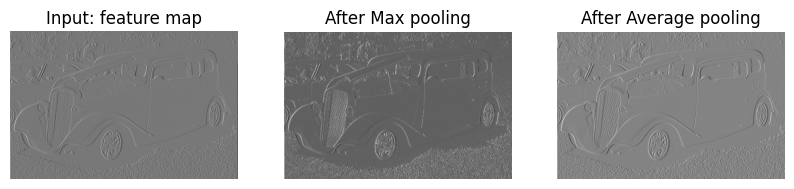

In [ ]:
import matplotlib.pyplot as plt # Import matplotlib for plotting

# Remove batch and channel dimensions from the input tensor for plotting
# squeeze(): Removes dimensions of size 1
# detach(): Creates a new tensor that does not require gradients
# numpy(): Converts the tensor to a NumPy array for plotting with matplotlib
input = output_tensor.squeeze().detach().numpy() # This is the feature map from the convolution

# Remove batch and channel dimensions from the output of the Max Pooling layer for plotting
out_max_pool = out_max_pool.squeeze().detach().numpy()

# Remove batch and channel dimensions from the output of the Average Pooling layer for plotting
out_avg_pool = out_avg_pool.squeeze().detach().numpy()

# Create a figure with a specified size to display three plots
plt.figure(figsize=(10, 4))

# Create the first subplot for the input feature map
plt.subplot(1, 3, 1) # 1 row, 3 columns, select the 1st plot
# Display the input feature map
plt.imshow(input, cmap='gray') # Use 'gray' colormap
plt.title('Input: feature map') # Set the title
plt.axis('off') # Hide axes

# Create the second subplot for the output after Max Pooling
plt.subplot(1, 3, 2) # 1 row, 3 columns, select the 2nd plot
# Display the output after Max Pooling
plt.imshow(out_max_pool, cmap='gray') # Use 'gray' colormap
plt.title('After Max pooling') # Set the title
plt.axis('off') # Hide axes

# Create the third subplot for the output after Average Pooling
plt.subplot(1, 3, 3) # 1 row, 3 columns, select the 3rd plot
# Display the output after Average Pooling
plt.imshow(out_avg_pool, cmap='gray') # Use 'gray' colormap
plt.title('After Average pooling') # Set the title
plt.axis('off') # Hide axes

plt.show() # Show the figure with all three plots

What are the dimensions of the image output from the pooling layers?

In [ ]:
# Print the shape (dimensions) of the input tensor (feature map)
print("Input image (feature map) dimensions:", input.shape)
# Print the shape (dimensions) of the output tensor after Max Pooling
# The spatial dimensions are reduced by half due to kernel_size=2 and stride=2
print("Output Max pooling dimensions:", out_max_pool.shape)
# Print the shape (dimensions) of the output tensor after Average Pooling
# The spatial dimensions are reduced by half due to kernel_size=2 and stride=2, same as Max Pooling
print("Output Average pooling dimensions:", out_avg_pool.shape)

Input image (feature map) dimensions: (587, 907)
Output Max pooling dimensions: (293, 453)
Output Average pooling dimensions: (293, 453)


## C] Dense layer

the `Linear` function can creates layers of fully connected neurons.

In [ ]:
from torch import nn # Import the neural network module from PyTorch

# Create a linear (dense) layer with 1 input feature and 1 output feature (a single neuron)
neuron = nn.Linear(1, 1) # 1 input and 1 output

# Create a linear (dense) layer with 1 input feature and 32 output features (a layer of 32 neurons)
dense_layer = nn.Linear(1, 32) # 1 input and 32 output

# Print the defined layers
neuron, dense_layer

(Linear(in_features=1, out_features=1, bias=True),
 Linear(in_features=1, out_features=32, bias=True))

In [ ]:
# Convert the output of the Max Pooling layer (which is a NumPy array after plotting) back to a PyTorch Tensor
# torch.tensor() infers the dtype, but it's good practice to specify if needed.
# This is done to make it compatible with PyTorch layers which expect tensors.
out_max_pool = torch.tensor(out_max_pool)
# Print the shape of the Max Pooling output tensor
print("MaxPooling output shape:", out_max_pool.shape)

# Flatten the Max Pooling output tensor into a 1-dimensional vector
# This is necessary because dense (Linear) layers expect a flattened input (a vector).
# torch.flatten(x, start_dim=1): Flattens all dimensions starting from dimension 1 (keeping the batch dimension if present, but here we don't have a batch dimension yet)
flatten_input = torch.flatten(out_max_pool)
# Print the shape of the tensor after flattening
print("output shape after flattening:", flatten_input.shape)

# Define a linear (dense) layer
# It takes as input a vector with a number of features equal to the size of the flattened input tensor.
# The output is a vector of dimension 32 (a layer of 32 neurons).
dense_layer = nn.Linear(flatten_input.shape[0], 32) # n input features (size of the flattened vector) and 32 output features

# Pass the flattened input vector through the dense layer
output = dense_layer(flatten_input)
# Print the output of the dense layer
output # This is a tensor representing the activations of the 32 neurons in the dense layer

MaxPooling output shape: torch.Size([293, 453])
output shape after flattening: torch.Size([132729])


tensor([-0.0145,  0.2473, -0.1050,  0.0696,  0.0412,  0.0789,  0.0348,  0.0701,
        -0.2044,  0.2371, -0.0462, -0.2651,  0.2014, -0.2590,  0.5132,  0.2817,
        -0.1224,  0.0865, -0.1466,  0.0569,  0.3746,  0.0778,  0.0513, -0.0063,
         0.1884,  0.0098,  0.0334,  0.2627, -0.2934,  0.0057, -0.1167,  0.2626],
       grad_fn=<ViewBackward0>)

## D] Activation functions

In [ ]:
# Define an input tensor X with a single value (15) and specify the data type as float32
X = torch.tensor([[15]], dtype=torch.float32)
# Define a linear (dense) layer with 1 input feature and 16 output features
dense_layer = nn.Linear(1, 16)

# Define the ReLU (Rectified Linear Unit) activation function
relu = nn.ReLU()
# Pass the input X through the dense layer to get the output before activation
output_layer = dense_layer(X)
# Print the output of the dense layer without applying the activation function
print("output without ReLU:", output_layer)
# Apply the ReLU activation function to the output of the dense layer
# ReLU replaces all negative values with zero.
print("relu output:", relu(output_layer))

output without ReLU: tensor([[ -1.0825,  -4.5084,  -7.7613, -14.7833,  -1.7725,  -4.4251, -11.5598,
           2.5876,   5.3307,   1.3249,  -2.2220,   0.0753,  -1.0331,  -3.3284,
           6.5000,  -9.6336]], grad_fn=<AddmmBackward0>)
relu output: tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 2.5876, 5.3307,
         1.3249, 0.0000, 0.0753, 0.0000, 0.0000, 6.5000, 0.0000]],
       grad_fn=<ReluBackward0>)


In [ ]:
# Define the Sigmoid activation function
sigmoid = nn.Sigmoid()
# Pass the input X through the dense layer again to get the output before activation
output_layer = dense_layer(X) # Re-using the dense_layer defined in the previous cell
# Print the output of the dense layer without applying the activation function
print("output without sigmoid:", output_layer)
# Apply the Sigmoid activation function to the output of the dense layer
# Sigmoid squashes the output values between 0 and 1.
print("sigmoid output:", sigmoid(output_layer))

output without sigmoid: tensor([[ -1.0825,  -4.5084,  -7.7613, -14.7833,  -1.7725,  -4.4251, -11.5598,
           2.5876,   5.3307,   1.3249,  -2.2220,   0.0753,  -1.0331,  -3.3284,
           6.5000,  -9.6336]], grad_fn=<AddmmBackward0>)
sigmoid output: tensor([[2.5304e-01, 1.0896e-02, 4.2571e-04, 3.7993e-07, 1.4523e-01, 1.1832e-02,
         9.5421e-06, 9.3006e-01, 9.9518e-01, 7.9000e-01, 9.7788e-02, 5.1882e-01,
         2.6248e-01, 3.4610e-02, 9.9850e-01, 6.5487e-05]],
       grad_fn=<SigmoidBackward0>)


---
# Session 3

---

# Part 2: Create a simple CNN model

Create a CNN for training grayscale image of size 28 x 28 pixels, with :


*   One 2D convolutionnal layer with 16 filters
*   One 2D convolutionnal layer with 32 filters
*   One MaxPooling layer with stride=2 and kernel=2
*   One Dense layer of 128 neurons
*   One Dense layer of 64 neurons
*   One ouput layer with 10 output





In [ ]:
import numpy as np # Import the numpy library for numerical operations

import torch # Import the PyTorch library
from torch import nn # Import the neural network module from PyTorch

# Import torchvision
import torchvision # Import the torchvision library, which provides access to datasets, models, and image transformations
from torchvision import datasets # Import the datasets module from torchvision, which contains standard datasets like MNIST
from torchvision.transforms import ToTensor, transforms # Import the ToTensor transform to convert PIL Images to PyTorch Tensors
from torch.utils.data import Subset

# Import matplotlib for visualization
import matplotlib.pyplot as plt # Import the matplotlib.pyplot module for creating plots and visualizations

In [ ]:
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()

        # First convolutional layer with 1 input channel (grayscale image) and 16 output channels (filters).
        # kernel_size=3 defines the filter size as 3x3.
        # padding=1 adds a padding of 1 pixel around the input to maintain spatial dimensions.
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, padding=1)
        # ReLU activation function to introduce non-linearity after the first convolution.
        self.relu1 = nn.ReLU()

        # Second convolutional layer with 16 input channels (from the previous layer's output) and 32 output channels.
        # kernel_size=3 and padding=1 are used again.
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1)
        # ReLU activation function after the second convolution.
        self.relu2 = nn.ReLU()

        # Max pooling layer to reduce the spatial dimensions (height and width) of the feature maps.
        # kernel_size=2 means the pooling window is 2x2.
        # stride=2 means the window moves 2 pixels at a time, effectively halving the dimensions.
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        # First fully connected (dense) layer.
        # The input features are calculated based on the output size of the pooling layer (32 channels * 14x14 spatial dimensions for a 28x28 input image).
        # It has 128 output features (neurons).
        self.fc1 = nn.Linear(32 * 14 * 14, 128)  # assuming input images are 28x28
        # Second fully connected (dense) layer with 128 input features and 64 output features.
        self.fc2 = nn.Linear(128, 64)

        # Output layer, a fully connected layer with 64 input features and 10 output features (for 10 classes in MNIST).
        self.out = nn.Linear(64, 10)

    def forward(self, x):
        # Define the forward pass of the network.
        # Input x is the image tensor.
        x = self.conv1(x) # Apply the first convolution.
        x = self.relu1(x) # Apply the first ReLU activation.
        x = self.conv2(x) # Apply the second convolution.
        x = self.relu2(x) # Apply the second ReLU activation.
        x = self.pool(x) # Apply the Max pooling layer.
        x = torch.flatten(x, 1)  # Flatten the output of the pooling layer into a 1D vector, keeping the batch dimension (dimension 1). This prepares the data for the dense layers.
        x = self.fc1(x) # Apply the first fully connected layer.
        x = self.fc2(x) # Apply the second fully connected layer.
        return self.out(x) # Apply the output layer and return the final output (raw scores for each class).

In [ ]:
# Preparation of our Yellow car image
img = Image.open(image).convert('L') # Open the downloaded image file and convert it to grayscale ('L' mode).

# Define a sequence of transforms to resize the image and convert it to a PyTorch tensor.
transform = transforms.Compose([
    transforms.Resize((28, 28)), # Resize the image to 28x28 pixels, which is the expected input size for the defined CNN model.
    transforms.ToTensor() # Convert the PIL Image to a PyTorch Tensor. This also scales the pixel values from [0, 255] to [0, 1] and rearranges the dimensions to [C, H, W].
])

# Apply the defined transforms to the grayscale image.
preprocess_image = transform(img) # The resulting tensor has shape: [channel, height, width] (1, 28, 28).

# Add a batch dimension to the tensor.
# CNN models in PyTorch expect input in the format [Batch Size, Channels, Height, Width].
preprocess_image = preprocess_image.unsqueeze(0) # Adds a dimension of size 1 at the beginning, resulting in shape: [batch, channel, height, width] (1, 1, 28, 28).

In [ ]:
preprocess_image.shape # Print the shape of the preprocessed image tensor to confirm it is in the expected format [1, 1, 28, 28].

torch.Size([1, 1, 28, 28])

In [ ]:
# Instantiate the SimpleCNN model. This creates an instance of the neural network class defined earlier.
model = SimpleCNN()

# Make predictions using the instantiated model.
# torch.inference_mode() context manager disables gradient calculation, which is not needed during inference and saves memory and computation.
with torch.inference_mode():
    # Pass the preprocessed image tensor through the model's forward pass to get predictions.
    preds = model(preprocess_image)

preds # Print the output of the model, which are the raw scores (logits) for each of the 10 output classes.

tensor([[-0.0718,  0.1791,  0.0057, -0.0188, -0.0958,  0.1107, -0.0362, -0.1033,
          0.1354, -0.1087]])

# Part 3: Example a classification with MNIST dataset

## Load existing datasets : MNIST

In [ ]:
# Setup training data
transform = transforms.Compose([
    transforms.ToTensor() # Define a transform to convert images to PyTorch tensors
])

train_data = datasets.MNIST(
    root="data", # Specify the directory where the dataset will be downloaded
    train=True, # Indicate that this is the training dataset
    download=True, # Download the dataset if it's not already present
    transform=transform, # Apply the ToTensor transform to the loaded images
    target_transform=None # No transformation applied to the labels
)

# Setup testing data
test_data = datasets.MNIST(
    root="data", # Specify the directory where the dataset is located
    train=False, # Indicate that this is the test dataset
    download=True, # Download the dataset if it's not already present
    transform=transform # Apply the ToTensor transform to the loaded images
)

# See classes
class_names = train_data.classes # Get the list of class names (digits 0-9) from the training data
class_names # Display the list of class names

100%|██████████| 9.91M/9.91M [00:00<00:00, 130MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 25.9MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 48.0MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 4.27MB/s]


['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

In [ ]:
# Select just a subset
train_data = Subset(train_data, range(1000))
test_data = Subset(test_data, range(250))

### Data Preparation

The DataLoader helps load data into a model for training and for inference.

It turns a large Dataset into a Python iterable of smaller chunks. These smaller chunks are called batches or mini-batches and can be set by the batch_size parameter.

Because it's more computationally efficient.

In an ideal world you could do the forward pass and backward pass across all of your data at once. But once you start using really large datasets, unless you've got infinite computing power, it's easier to break them up into batches. So it's more computationally efficient it's also gives your model more opportunities to improve.

With mini-batches (small portions of the data), gradient descent is performed more often per epoch (once per mini-batch rather than once per epoch).

In [ ]:
from torch.utils.data import DataLoader # Import the DataLoader class from torch.utils.data

# Setup the batch size hyperparameter
BATCH_SIZE = 1024 # Define the number of samples per batch

# Turn datasets into iterables (batches)
train_dataloader = DataLoader(train_data, # Use the training dataset
    batch_size=BATCH_SIZE, # Set the batch size for the training data
    shuffle=True # Shuffle the data at the beginning of each epoch for better training
)

test_dataloader = DataLoader(test_data, # Use the test dataset
    batch_size=BATCH_SIZE, # Set the batch size for the test data
    shuffle=False # No need to shuffle test data for evaluation
)

# Let's check out what we've created
print(f"Dataloaders: {train_dataloader, test_dataloader}") # Print the DataLoader objects
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}") # Print the number of batches in the training DataLoader
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}") # Print the number of batches in the test DataLoader

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x7d31b6c8cc50>, <torch.utils.data.dataloader.DataLoader object at 0x7d31b6dd4690>)
Length of train dataloader: 1 batches of 1024
Length of test dataloader: 1 batches of 1024


In [ ]:
# 1. Check for GPU availability
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Using device: {device}")

Using device: cpu


In [ ]:
# Get one batch
images, labels = next(iter(train_dataloader)) # Get the next batch of images and labels from the training DataLoader

print(images.shape) # Print the shape of the images tensor in the batch (Batch Size, Channels, Height, Width)

torch.Size([1000, 1, 28, 28])


In [ ]:
# Instantiate model :
model = SimpleCNN() # Create an instance of the SimpleCNN model defined earlier

# Predictions
with torch.inference_mode(): # Disable gradient calculation for inference
    for data, labels in test_dataloader : # Iterate through batches in the test DataLoader
        preds = model(data) # Pass the image data through the model to get predictions

preds[0,:] # Print the predictions (logits) for the first image in the last batch

tensor([ 0.0057, -0.0703, -0.0682,  0.0325, -0.0319, -0.1048, -0.0548,  0.1316,
         0.1338,  0.0748])

In [ ]:
from sklearn.metrics import accuracy_score # Import the accuracy_score function from scikit-learn
loss_fn = nn.CrossEntropyLoss() # Define the loss function as Cross-Entropy Loss, commonly used for classification
optimizer = torch.optim.Adam(model.parameters(), lr=0.01) # Define the optimizer as Adam, with a learning rate of 0.01. It will update the model's parameters.


# Training and testing loop
epochs = 10 # Define the number of training epochs
for epoch in range(epochs): # Loop through each epoch
    for X_train, y_train in train_dataloader : # Iterate through batches of training data
        model.train() # Set the model to training mode (enables dropout, batch normalization, etc.)
        outputs = model(X_train) # Perform a forward pass to get model outputs (predictions)
        loss = loss_fn(outputs, y_train) # Calculate the loss between the model outputs and the true labels

        optimizer.zero_grad() # Zero the gradients of the optimizer
        loss.backward() # Perform backpropagation to calculate gradients
        optimizer.step() # Update the model's parameters based on the calculated gradients

    model.eval() # Set the model to evaluation mode (disables dropout, batch normalization, etc.)
    all_preds = [] # Initialize an empty list to store all predictions
    all_labels = [] # Initialize an empty list to store all true labels
    with torch.inference_mode(): # Disable gradient calculation for inference
        for X_test, y_test in test_dataloader: # Iterate through batches of test data
            test_preds = model(X_test) # Perform a forward pass to get model predictions on test data
            test_pred_labels = torch.argmax(test_preds, dim=1) # Get the predicted class label by finding the index of the maximum logit

            all_preds.append(test_pred_labels.cpu()) # Append the predicted labels to the list (move to CPU if on GPU)
            all_labels.append(y_test.cpu()) # Append the true labels to the list (move to CPU if on GPU)

    # Concaténer toutes les prédictions et labels
    all_preds = torch.cat(all_preds) # Concatenate all predicted labels into a single tensor
    all_labels = torch.cat(all_labels) # Concatenate all true labels into a single tensor
    acc = accuracy_score(all_labels, all_preds) # Calculate the accuracy score
    print(f"Epoch {epoch+1}/{epochs} | Loss: {loss.item():.4f} | Test Accuracy: {acc:.4f}") # Print the epoch number, training loss, and test accuracy

Epoch 1/10 | Loss: 2.3032 | Test Accuracy: 0.3760
Epoch 2/10 | Loss: 2.0761 | Test Accuracy: 0.2240
Epoch 3/10 | Loss: 3.4455 | Test Accuracy: 0.3200
Epoch 4/10 | Loss: 2.4006 | Test Accuracy: 0.4880
Epoch 5/10 | Loss: 1.8086 | Test Accuracy: 0.4840
Epoch 6/10 | Loss: 1.7153 | Test Accuracy: 0.4560
Epoch 7/10 | Loss: 1.5580 | Test Accuracy: 0.5520
Epoch 8/10 | Loss: 1.2288 | Test Accuracy: 0.6640
Epoch 9/10 | Loss: 0.9389 | Test Accuracy: 0.7160
Epoch 10/10 | Loss: 0.7734 | Test Accuracy: 0.7120


In [ ]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from sklearn.metrics import accuracy_score
import torchvision # Assuming you're using torchvision datasets, if not, adjust train_data/test_data loading

# Define a simple CNN model (assuming you have this defined elsewhere)
# If you don't have this, you'll need to define your SimpleCNN class
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(64 * 7 * 7, 10) # Adjust input features based on your image size (e.g., for 28x28 MNIST)

    def forward(self, x):
        x = self.pool1(self.relu1(self.conv1(x)))
        x = self.pool2(self.relu2(self.conv2(x)))
        x = x.view(x.size(0), -1) # Flatten the tensor
        x = self.fc1(x)
        return x

# 1. Check for GPU availability
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Using device: {device}")

# 2. Load your dataset (example with MNIST, replace with your actual data loading)
# If your data is already in tensor format, skip this and just ensure it's moved to device later
transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize((0.1307,), (0.3081,))
])

train_data = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_data = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Setup the batch size hyperparameter
BATCH_SIZE = 1024

# Turn datasets into iterables (batches)
train_dataloader = DataLoader(train_data,
    batch_size=BATCH_SIZE,
    shuffle=True
)

test_dataloader = DataLoader(test_data,
    batch_size=BATCH_SIZE,
    shuffle=False
)

# Let's check out what we've created
print(f"Dataloaders: {train_dataloader, test_dataloader}")
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

# Get one batch (and move to device for checking)
images, labels = next(iter(train_dataloader))
images, labels = images.to(device), labels.to(device) # Move to device

print(images.shape)

# Instantiate model and move it to the GPU
model = SimpleCNN().to(device) # Move model to the selected device

# Predictions (initial check)
with torch.inference_mode():
    for data, labels_val in test_dataloader : # Renamed labels to labels_val to avoid conflict
        data = data.to(device) # Move data to device
        preds = model(data)
        break # Just get one batch for the check

print("Initial predictions (logits) for the first image in a batch:", preds[0,:])

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Training and testing loop
epochs = 10
for epoch in range(epochs):
    # Training
    model.train()
    for X_train, y_train in train_dataloader :
        X_train, y_train = X_train.to(device), y_train.to(device) # Move data to device
        outputs = model(X_train)
        loss = loss_fn(outputs, y_train)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Testing
    model.eval()
    all_preds = []
    all_labels = []
    with torch.inference_mode():
        for X_test, y_test in test_dataloader:
            X_test, y_test = X_test.to(device), y_test.to(device) # Move data to device
            test_preds = model(X_test)
            test_pred_labels = torch.argmax(test_preds, dim=1)

            all_preds.append(test_pred_labels.cpu()) # Move back to CPU for sklearn's accuracy_score
            all_labels.append(y_test.cpu()) # Move back to CPU

    all_preds = torch.cat(all_preds)
    all_labels = torch.cat(all_labels)
    acc = accuracy_score(all_labels, all_preds)
    print(f"Epoch {epoch+1}/{epochs} | Loss: {loss.item():.4f} | Test Accuracy: {acc:.4f}")

Using device: cpu
Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x7d31b6cff910>, <torch.utils.data.dataloader.DataLoader object at 0x7d319cc02ed0>)
Length of train dataloader: 59 batches of 1024
Length of test dataloader: 10 batches of 1024
torch.Size([1024, 1, 28, 28])
Initial predictions (logits) for the first image in a batch: tensor([-0.0041,  0.0533,  0.1787, -0.1661,  0.0138,  0.0013,  0.1001,  0.1777,
         0.1542, -0.0038])
Epoch 1/10 | Loss: 0.1177 | Test Accuracy: 0.9697
Epoch 2/10 | Loss: 0.0610 | Test Accuracy: 0.9781
Epoch 3/10 | Loss: 0.0576 | Test Accuracy: 0.9814
Epoch 4/10 | Loss: 0.0670 | Test Accuracy: 0.9806
Epoch 5/10 | Loss: 0.0349 | Test Accuracy: 0.9842
Epoch 6/10 | Loss: 0.0439 | Test Accuracy: 0.9826
Epoch 7/10 | Loss: 0.0526 | Test Accuracy: 0.9862
Epoch 8/10 | Loss: 0.0246 | Test Accuracy: 0.9857
Epoch 9/10 | Loss: 0.0360 | Test Accuracy: 0.9862
Epoch 10/10 | Loss: 0.0263 | Test Accuracy: 0.9862
